Estimated coefficients:
b_0 = 1.2363636363636363  \ 
b_1 = 1.1696969696969697


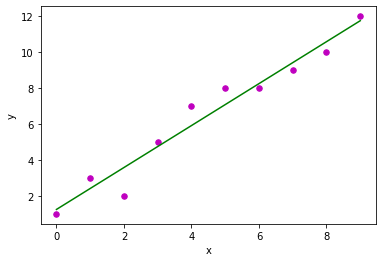

In [16]:

import numpy as np 
import matplotlib.pyplot as plt 
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 
  
def main(): 
    # observations 
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}  \ \nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
    main() 


Estimated regression coefficients: [[  1.70474504  15.04062212 -20.47216021]]
No. of iterations: 2612
Correctly predicted labels: 100


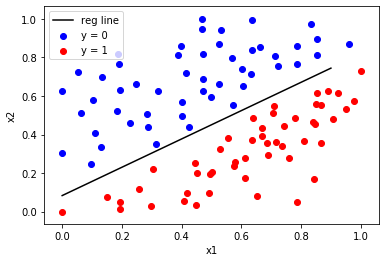

In [10]:
import csv 
import numpy as np 
import matplotlib.pyplot as plt 


def loadCSV(filename): 
	''' 
	function to load dataset 
	'''
	with open(filename,"r") as csvfile: 
		lines = csv.reader(csvfile) 
		dataset = list(lines) 
		for i in range(len(dataset)): 
			dataset[i] = [float(x) for x in dataset[i]]	 
	return np.array(dataset) 


def normalize(X): 
	''' 
	function to normalize feature matrix, X 
	'''
	mins = np.min(X, axis = 0) 
	maxs = np.max(X, axis = 0) 
	rng = maxs - mins 
	norm_X = 1 - ((maxs - X)/rng) 
	return norm_X 


def logistic_func(beta, X): 
	''' 
	logistic(sigmoid) function 
	'''
	return 1.0/(1 + np.exp(-np.dot(X, beta.T))) 


def log_gradient(beta, X, y): 
	''' 
	logistic gradient function 
	'''
	first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1) 
	final_calc = np.dot(first_calc.T, X) 
	return final_calc 


def cost_func(beta, X, y): 
	''' 
	cost function, J 
	'''
	log_func_v = logistic_func(beta, X) 
	y = np.squeeze(y) 
	step1 = y * np.log(log_func_v) 
	step2 = (1 - y) * np.log(1 - log_func_v) 
	final = -step1 - step2 
	return np.mean(final) 


def grad_desc(X, y, beta, lr=.01, converge_change=.001): 
	''' 
	gradient descent function 
	'''
	cost = cost_func(beta, X, y) 
	change_cost = 1
	num_iter = 1
	
	while(change_cost > converge_change): 
		old_cost = cost 
		beta = beta - (lr * log_gradient(beta, X, y)) 
		cost = cost_func(beta, X, y) 
		change_cost = old_cost - cost 
		num_iter += 1
	
	return beta, num_iter 


def pred_values(beta, X): 
	''' 
	function to predict labels 
	'''
	pred_prob = logistic_func(beta, X) 
	pred_value = np.where(pred_prob >= .5, 1, 0) 
	return np.squeeze(pred_value) 


def plot_reg(X, y, beta): 
	''' 
	function to plot decision boundary 
	'''
	# labelled observations 
	x_0 = X[np.where(y == 0.0)] 
	x_1 = X[np.where(y == 1.0)] 
	
	# plotting points with diff color for diff label 
	plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
	plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
	
	# plotting decision boundary 
	x1 = np.arange(0, 1, 0.1) 
	x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2] 
	plt.plot(x1, x2, c='k', label='reg line') 

	plt.xlabel('x1') 
	plt.ylabel('x2') 
	plt.legend() 
	plt.show() 
	

	
if __name__ == "__main__": 
	# load the dataset 
	dataset = loadCSV('dataset1.csv') 
	
	# normalizing feature matrix 
	X = normalize(dataset[:, :-1]) 
	
	# stacking columns wth all ones in feature matrix 
	X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 

	# response vector 
	y = dataset[:, -1] 

	# initial beta values 
	beta = np.matrix(np.zeros(X.shape[1])) 

	# beta values after running gradient descent 
	beta, num_iter = grad_desc(X, y, beta) 

	# estimated beta values and number of iterations 
	print("Estimated regression coefficients:", beta) 
	print("No. of iterations:", num_iter) 

	# predicted labels 
	y_pred = pred_values(beta, X) 
	
	# number of correctly predicted labels 
	print("Correctly predicted labels:", np.sum(y == y_pred)) 
	
	# plotting regression line 
	plot_reg(X, y, beta) 


In [11]:

from sklearn import datasets, linear_model, metrics 
   
# load the digit dataset 
digits = datasets.load_digits() 
   
# defining feature matrix(X) and response vector(y) 
X = digits.data 
y = digits.target 
  
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=1) 
   
# create logistic regression object 
reg = linear_model.LogisticRegression() 
   
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred = reg.predict(X_test) 
   
# comparing actual response values (y_test) with predicted response values (y_pred) 
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(y_test, y_pred)*100) 


/home/rohitbhalerao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rohitbhalerao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression model accuracy(in %): 95.6884561891516
